In [1]:
# set MATPLOTLIB to use auto backend - this will display figures in separate windows and
# is required for the animation to display correctly
import matplotlib.pyplot as plt

# Load the 2D lung MRI image using the imread function from the scikit-image python library
import skimage.io
img = skimage.io.imread('lung_MRI_slice.png')

# Check the data type of the image
print(img.dtype)


uint8


In [2]:

# convert data type to double to avoid errors when processing integers
import numpy as np
# convert img to double
img = np.double(img)
print(img.dtype)

float64


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Load 2D lung
import skimage.io
img = skimage.io.imread('lung_MRI_slice.png')

img.dtype

# convert data type to double to avoid errors when processing integers
img = np.double(img)
img.dtype

dtype('float64')

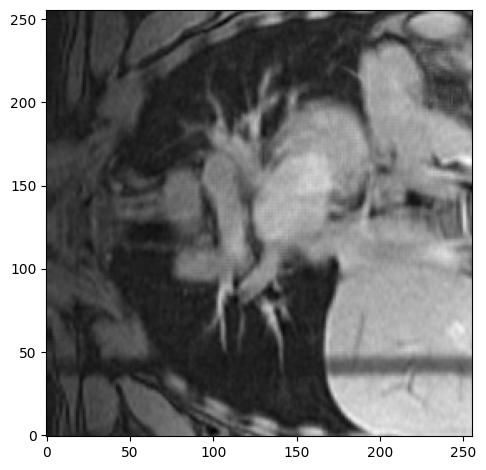

In [3]:
# display the image using the dispImage function from utils.py
from utils import dispImage
dispImage(img)

Therefore, before proceeding you should reorientate the image into ‘standard orientation’. This can be done by first taking the transpose of the matrix (switching x and y dimensions) and then flipping along the second dimension (moving the first pixel from the top to the bottom of the image). Add code to the template script to do this. Now display the image using the dispImagefunction from utils.py. If you have reorientated the image correctly it should appear like this:

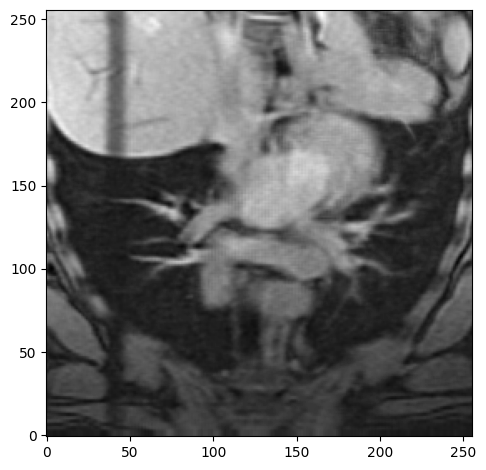

In [5]:
# Transpose the image
img_standard = img.T
dispImage(img_standard)


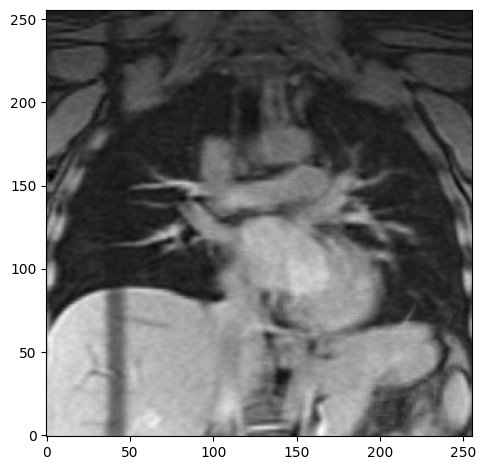

In [6]:

# Flip along the second dimension
img_standard = np.flip(img_standard, 1)

# display the image using the dispImage function from utils.py
from utils import dispImage
dispImage(img_standard)

## Translating and resampling

Create an affine matrix representing a translation by 10 pixels in the x direction and 20
pixels in the y direction. The template script provides code that creates an identity matrix
and can be edited to create the desired matrix.
Add/edit code in the template script to use the provided defFieldFromAffineMatrix
function to create a deformation field from the affine matrix, and resample the image with
the deformation field using the provided resampImageWithDefField function. The
functions include comments explaining what the inputs and outputs of the functions should
be. Now display the transformed image. If you have done this correctly it should appear like
this:

In [7]:
img_standard.shape

(256, 256)

In [8]:
# Create affine matrix representing a translation by 10 pixels in x and 20 pixels in y
T = np.matrix([[1, 0, 10.5],[0,1,20.5],[0,0,1]])
T

matrix([[ 1. ,  0. , 10.5],
        [ 0. ,  1. , 20.5],
        [ 0. ,  0. ,  1. ]])

In [9]:
# Create a deformation field from the affine matrix
from utils import defFieldFromAffineMatrix
def_field = defFieldFromAffineMatrix(T, *img_standard.shape) # Deformation field says how each pixel in the image should be moved
def_field.shape

(256, 256, 2)

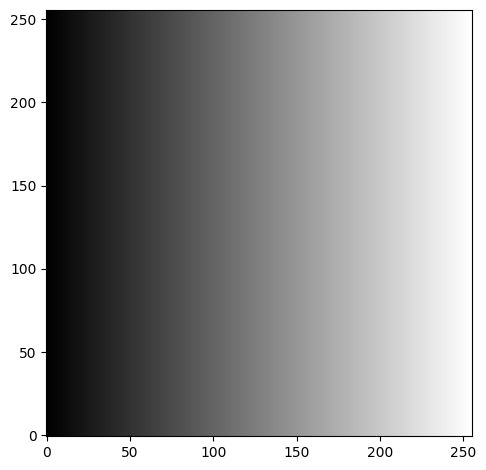

In [61]:
dispImage(def_field[:,:,0])

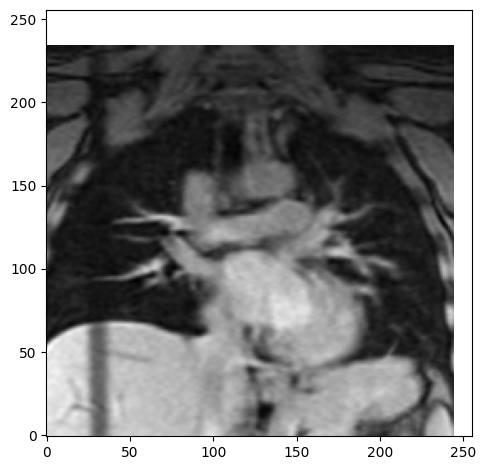

In [11]:
from utils import resampImageWithDefField
img_resampled_linear = resampImageWithDefField(img_standard, def_field, interp_method = 'linear', pad_value=np.NaN)
# ***************

# display the transformed image
dispImage(img_resampled_linear)

Read more on deformation matrixes

In [63]:
def_field

array([[[ 10.5,  20.5],
        [ 10.5,  21.5],
        [ 10.5,  22.5],
        ...,
        [ 10.5, 273.5],
        [ 10.5, 274.5],
        [ 10.5, 275.5]],

       [[ 11.5,  20.5],
        [ 11.5,  21.5],
        [ 11.5,  22.5],
        ...,
        [ 11.5, 273.5],
        [ 11.5, 274.5],
        [ 11.5, 275.5]],

       [[ 12.5,  20.5],
        [ 12.5,  21.5],
        [ 12.5,  22.5],
        ...,
        [ 12.5, 273.5],
        [ 12.5, 274.5],
        [ 12.5, 275.5]],

       ...,

       [[263.5,  20.5],
        [263.5,  21.5],
        [263.5,  22.5],
        ...,
        [263.5, 273.5],
        [263.5, 274.5],
        [263.5, 275.5]],

       [[264.5,  20.5],
        [264.5,  21.5],
        [264.5,  22.5],
        ...,
        [264.5, 273.5],
        [264.5, 274.5],
        [264.5, 275.5]],

       [[265.5,  20.5],
        [265.5,  21.5],
        [265.5,  22.5],
        ...,
        [265.5, 273.5],
        [265.5, 274.5],
        [265.5, 275.5]]])

In [64]:
print(img_resampled[255,255])

nan


The resampImageWithDefFieldfunction uses linearinterpolation by default. It is implemented using scipy’s interpnfunction, so can also use the other interpolation methods available for this function. These include nearest neighbourandsplinef2d, which is an efficient implementation of cubic interpolation using splines(note –it also has an interpolationmethod called cubic, which gives very similar,results but is much slower). Addcode tothe template scriptto resample the image using nearest neighbourand splinef2dinterpolations, and display the results in separate figures

In [65]:
import scipy.interpolate as scii
def resampImageWithDefField(source_img, def_field, interp_method = 'nearest', pad_value=np.NaN):
  """
 function to resample a 2D image with a 2D deformation field

 SYNTAX:
   resamp_img = resampImageWithDefField(source_img, def_field)
   resamp_img = resampImageWithDefField(source_img, def_field, interp_method)
   resamp_img = resampImageWithDefField(source_img, def_field, interp_method, pad_value)

 INPUTS:
   source_img - the source image to be resampled, as a 2D matrix
   def_field - the deformation field, as a 3D matrix
   inter_method - any of the interpolation methods accepted by interpn
       function
       default = 'linear'
   pad_value - the value to assign to pixels that are outside the source
       image
       default = NaN

 OUTPUTS:
   resamp_img - the resampled image

 NOTES:
   the deformation field should be a 3D matrix, where the size of the
   first two dimensions is the size of the resampled image, and the size
   of the 3rd dimension is 2. def_field(:,:,1) contains the x coordinates
   of the transformed pixels, def_field(:,:,2) contains the y coordinates
   of the transformed pixels.
   the origin of the source image is assumed to be the bottom left pixel
  """
  x_coords = np.arange(source_img.shape[0], dtype = 'float')
  y_coords = np.arange(source_img.shape[1], dtype = 'float')
  
  # resample image using interpn function
  return scii.interpn((x_coords, y_coords), source_img, def_field, bounds_error=False, fill_value=pad_value, method=interp_method)

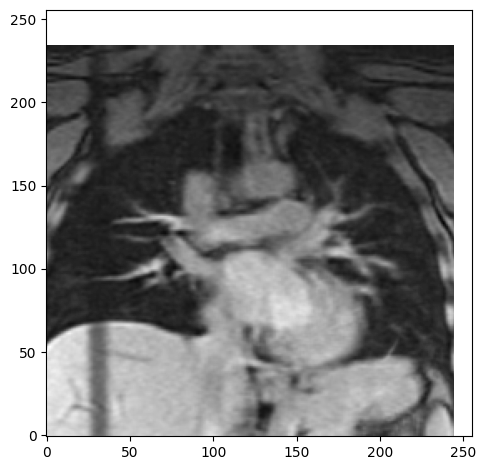

In [66]:
img_resampled_splinef2d = resampImageWithDefField(img_standard, def_field, interp_method = 'splinef2d', pad_value=np.NaN)
# ***************

# display the transformed image
dispImage(img_resampled_splinef2d)

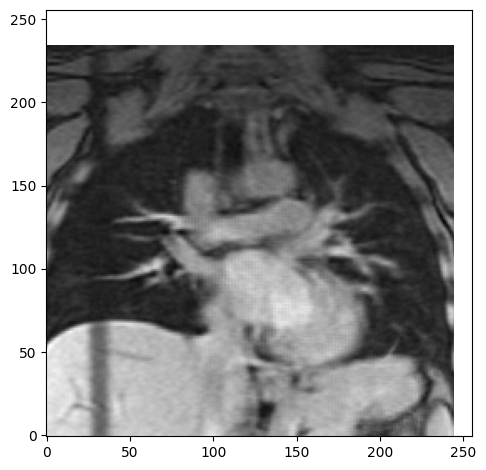

In [67]:
from utils import resampImageWithDefField
img_resampled_nearest = resampImageWithDefField(img_standard, def_field, interp_method = 'nearest', pad_value=np.NaN)
# ***************

# display the transformed image
dispImage(img_resampled_nearest)

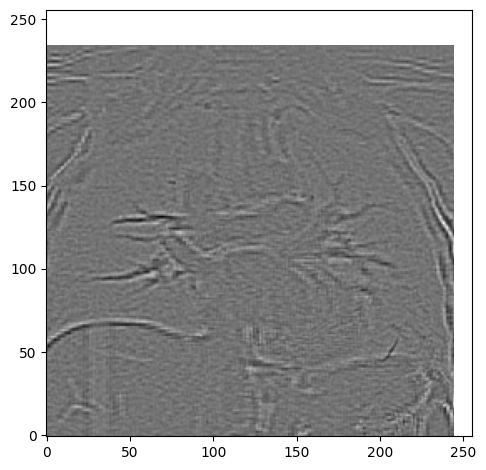

In [68]:
# Find the difference between the original image and the resampled image
img_diff = img_resampled_linear - img_resampled_splinef2d
dispImage(img_diff)

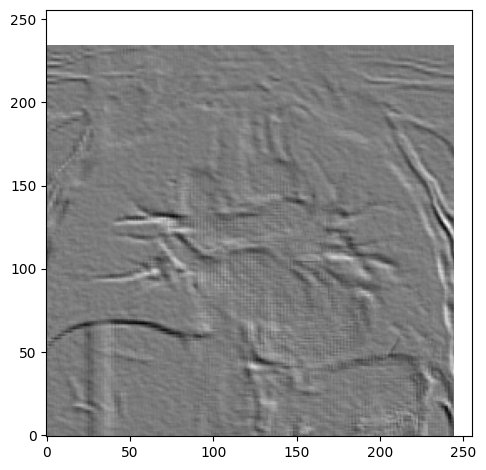

In [69]:
img_diff = img_resampled_linear - img_resampled_nearest
dispImage(img_diff)

Note – the values in the difference image for splinef2d are very small, in the order of 10-14 and can be attributed to numerical errors. So, the different interpolation all give (very
almost) the same results. Do you understand why this is the case?
Now add code to the template script that repeats the steps above using a translation of 10.5
pixels in the x direction and 20.5 pixels in the y direction. The difference images should look
like this:


## Rotating images and composing transformations


Add code to the template script that implements a function to calculate the affine matrix
corresponding to a rotation about a point, P. The inputs to the function should be the angle
of rotation (in degrees) and the coordinates of the point and the output should be the affine
matrix.


In [23]:
# define a function to calculate the affine matrix for a rotation about a point
def affineMatrixForRotationAboutPoint(theta, p_coords):
  """
  function to calculate the affine matrix corresponding to an anticlockwise
  rotation about a point
  
  INPUTS:    theta: the angle of the rotation, specified in degrees
             p_coords: the 2D coordinates of the point that is the centre of
                 rotation. p_coords[0] is the x coordinate, p_coords[1] is
                 the y coordinate
  
  OUTPUTS:   aff_mat: a 3 x 3 affine matrix
  """
  # ***************
 # Create affine matrix representing an anticlockwise frotationb
  theta = np.deg2rad(theta)
  aff_mat = np.matrix([[np.cos(theta), -np.sin(theta), (1-np.cos(theta))*p_coords[0]-np.sin(theta)*p_coords[1]],
  [np.sin(theta), np.cos(theta), np.sin(theta)*p_coords[0]+(1-np.cos(theta))*p_coords[1]],
  [0, 0, 1]])
  
  return aff_mat

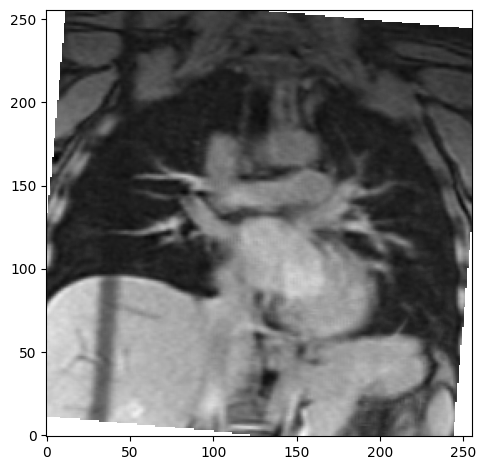

Bad pipe message: %s [b'1\xd7\xea\x01\xb1U3MM\x9d\xea\x88\xd8{H\x1d\x07\xb3 \x95\xe6\xd6\xa1]\x9f\xef(\xbc\x16\x0e[\xa2\x9bs/\x18p$\x87>;\n\x02\xf47x\x9e\xd1\x04\xad:\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 W8{`\xae\xebDd\xf14}\xb4<b"\xffQ/\xe8']
Bad pipe message: %s [b"\xde\x9c\xd8vK\xc7\xad\xa4\x9eM\x16\xe7g\xa6\x1e\xc4w\xfa\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003

In [58]:
# Centre coordinates
points = (np.array(img_standard.shape) - 1)/2
angle = 5
angle = np.deg2rad(angle)
# First apply translation to the centre of the image
T1 = np.matrix([[1, 0, -points[0]], [0, 1, -points[1]], [0,0,1]])
# Then apply rotation
#R = affineMatrixForRotationAboutPoint(angle, points)
R = np.matrix([[np.cos(angle), -np.sin(angle), 0],[np.sin(angle), np.cos(angle), 0], [0,0,1]])
# Then apply translation back to the original centre of the image
T2 = np.matrix([[1, 0, points[0]], [0, 1, points[1]], [0,0,1]])

# Combine the three affine matrices into one
T = T2*R*T1

from utils import defFieldFromAffineMatrix
def_field = defFieldFromAffineMatrix(T, *img_standard.shape) # Deformation field says how each pixel in the image should be moved


img_resampled_linear = resampImageWithDefField(img_standard, def_field, interp_method = 'linear', pad_value=np.NaN)
# ***************

# display the transformed image
dispImage(img_resampled_linear)


In [24]:

points = (np.array(img_standard.shape) - 1)/2
R = affineMatrixForRotationAboutPoint(angle, points)
R

matrix([[  0.9961947 ,  -0.08715574, -10.62718121],
        [  0.08715574,   0.9961947 ,  11.59753319],
        [  0.        ,   0.        ,   1.        ]])

Now add code to the template script that uses the above function to calculate the affine
matrix representing an anticlockwise rotation of 5 degrees about the centre of the image.
Note – the image has an even number of pixels in each dimension, so the centre of the
image will not be the centre of a pixel. The width and height of the image referred to in the
lecture slides are the width and height from the centre of the first pixel to the centre of the
last pixel, i.e. width = number of pixels in x – 1, height = number of pixels in y – 1. Add code
to transform the original image using the rotation you just created and display the result.
Linear interpolation should be used when resampling the image, and the intensity limits
from the original image when displaying the results. The result should look like this:

In [29]:
from utils import defFieldFromAffineMatrix
def_field = defFieldFromAffineMatrix(T, *img_standard.shape) # Deformation field says how each pixel in the image should be moved
def_field.shape

(256, 256, 2)

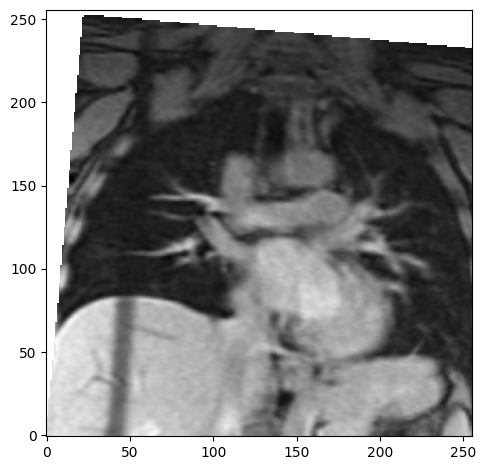

In [30]:
from utils import resampImageWithDefField
img_resampled_linear = resampImageWithDefField(img_standard, def_field, interp_method = 'linear', pad_value=np.NaN)
# ***************

# display the transformed image
dispImage(img_resampled_linear)